In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

In [2]:
fifa = pd.read_csv('players_20.csv')
fifa

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [3]:
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
# Data cleaning 


In [5]:
# drop unnecessary columns 

fifa = fifa.drop(["sofifa_id", 'player_url', "dob","long_name" ], axis =1)

In [6]:
fifa.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [7]:
# converting ratings (68+2) to 68
def clean_position(val):
    if isinstance(val, str):
        return int(val.split('+')[0])
    return val 

position_cols = ["lwb","ldm","cdm", "rdm",'rwb','lb','lcb','cb','rcb','rb']
# fifa[position_cols]= fifa[position_cols].applymap(clean_position)

fifa[position_cols] = fifa[position_cols].apply(lambda col: col.map(clean_position))


In [8]:
fifa.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66.0,61.0,61.0,61.0,66.0,61.0,46.0,46.0,46.0,61.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0


In [9]:
fifa.isnull().median()

short_name     0.0
age            0.0
height_cm      0.0
weight_kg      0.0
nationality    0.0
              ... 
lb             0.0
lcb            0.0
cb             0.0
rcb            0.0
rb             0.0
Length: 100, dtype: float64

In [10]:
fifa.shape

(18278, 100)

In [11]:
fifa.size

1827800

In [12]:
fifa.describe

<bound method NDFrame.describe of               short_name  age  height_cm  weight_kg nationality  \
0               L. Messi   32        170         72   Argentina   
1      Cristiano Ronaldo   34        187         83    Portugal   
2              Neymar Jr   27        175         68      Brazil   
3               J. Oblak   26        188         87    Slovenia   
4              E. Hazard   28        175         74     Belgium   
...                  ...  ...        ...        ...         ...   
18273         Shao Shuai   22        186         79    China PR   
18274       Xiao Mingjie   22        177         66    China PR   
18275          Zhang Wei   19        186         75    China PR   
18276       Wang Haijian   18        185         74    China PR   
18277         Pan Ximing   26        182         78    China PR   

                                club  overall  potential  value_eur  wage_eur  \
0                       FC Barcelona       94         94   95500000    565000   

In [13]:
fifa.dtypes

short_name      object
age              int64
height_cm        int64
weight_kg        int64
nationality     object
                ...   
lb             float64
lcb            float64
cb             float64
rcb            float64
rb             float64
Length: 100, dtype: object

In [14]:
# Handle missing values (fill with median )

fifa = fifa.fillna(fifa.median(numeric_only=True))



In [15]:
fifa.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66.0,61.0,61.0,61.0,66.0,61.0,46.0,46.0,46.0,61.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,58.0,58.0,58.0,58.0,58.0,57.0,57.0,57.0,57.0,57.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0


In [16]:
fifa.info

<bound method DataFrame.info of               short_name  age  height_cm  weight_kg nationality  \
0               L. Messi   32        170         72   Argentina   
1      Cristiano Ronaldo   34        187         83    Portugal   
2              Neymar Jr   27        175         68      Brazil   
3               J. Oblak   26        188         87    Slovenia   
4              E. Hazard   28        175         74     Belgium   
...                  ...  ...        ...        ...         ...   
18273         Shao Shuai   22        186         79    China PR   
18274       Xiao Mingjie   22        177         66    China PR   
18275          Zhang Wei   19        186         75    China PR   
18276       Wang Haijian   18        185         74    China PR   
18277         Pan Ximing   26        182         78    China PR   

                                club  overall  potential  value_eur  wage_eur  \
0                       FC Barcelona       94         94   95500000    565000   
1

In [17]:
#Encode categorical columns 
label_enc = LabelEncoder()
for col in fifa.select_dtypes(include=['object']).columns:
    fifa[col]= label_enc.fit_transform(fifa[col])
    

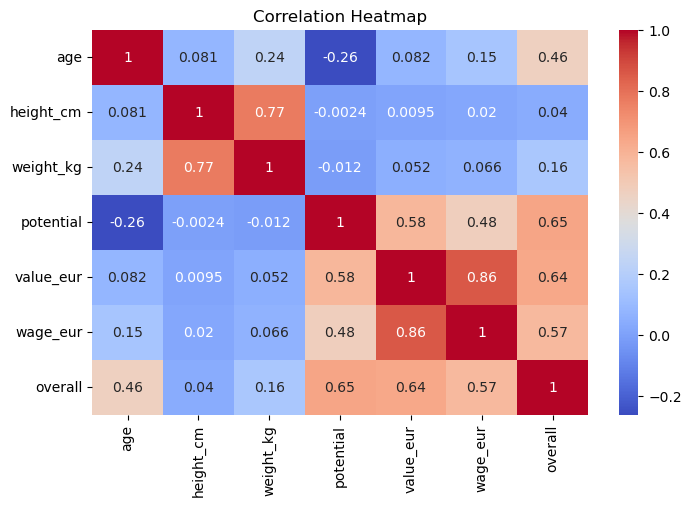

In [18]:
# Exploratory Data Analysis 

# correlation 

plt.figure(figsize=(8,5))
sns.heatmap(fifa[['age','height_cm','weight_kg', 'potential','value_eur','wage_eur',
                  'overall']].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

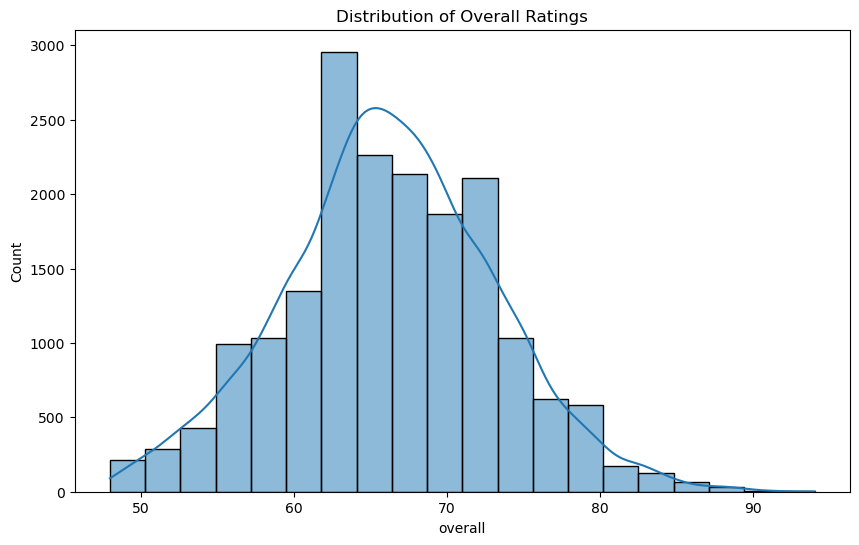

In [19]:
# histograph
plt.figure(figsize=(10,6))
sns.histplot(fifa['overall'], bins=20, kde =True)
plt.title('Distribution of Overall Ratings')
plt.show()

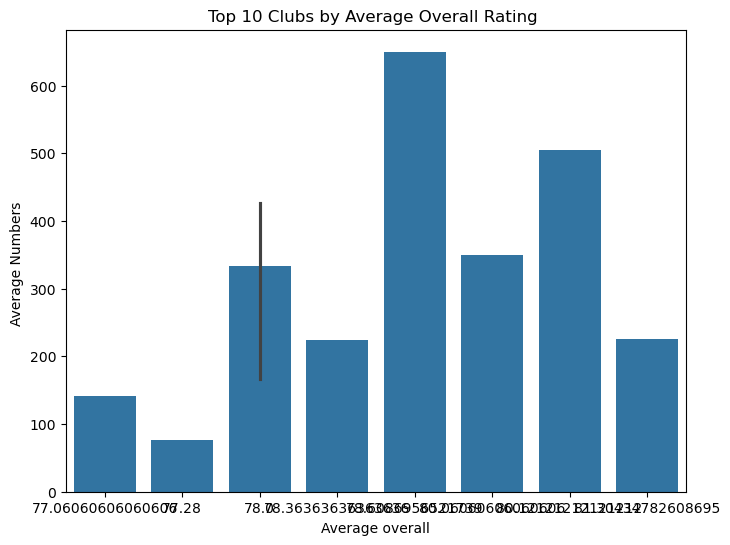

In [20]:
# bargraph
top_clubs= fifa.groupby('club')['overall'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_clubs.values, y=top_clubs.index)
plt.title("Top 10 Clubs by Average Overall Rating ")
plt.xlabel('Average overall')
plt.ylabel('Average Numbers ')
plt.show()

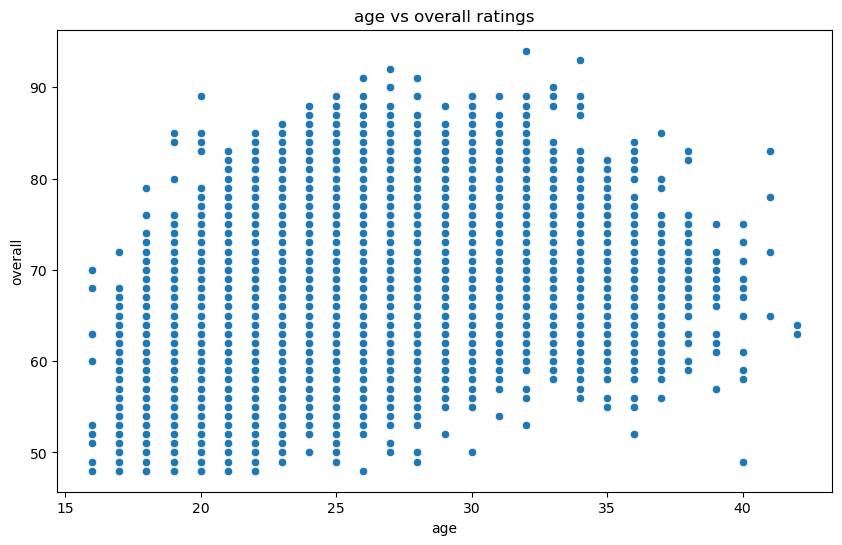

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=(fifa['age']),y=fifa['overall'])
plt.title('age vs overall ratings')
plt.show()

In [22]:
# Feature and Target selection 

# - target are always what i want to predict
# - feature are  the variables use to make predictions 

In [23]:

# Features and target
X = fifa.drop('overall', axis=1)
y = fifa['overall']

# Split dataset correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [24]:
# Machine Learning Models 


In [25]:
# Linear Regression 

# create and train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# make predicton 
y_pred_lr = lr.predict(X_test_scaled)


# evaluate model performance 
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Square Error: {mse}")
print(f"R-squared: {r2}")
print(f"coefficients: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")

Mean Square Error: 2.4862398116417257
R-squared: 0.9473796308707322
coefficients: [ 2.33761595e-02  2.12516964e+00 -1.83948248e-02  1.15080899e-01
  5.15215341e-02  2.47551070e-02  2.40873273e+00  1.09735544e+00
  3.42897046e-02 -6.63347491e-02 -5.63433580e-02 -1.69804993e-01
 -1.72813022e-02  2.57410540e-01 -7.63220714e-03  6.13127093e-02
  8.87327677e-02 -4.27871989e-01 -8.92631975e-02 -5.16976099e-02
 -8.40305867e-02 -9.11452814e-03  4.03403339e-02  1.02675712e-01
 -2.02337335e-02 -2.60352922e-03 -3.50977245e+00 -1.87962202e+00
 -1.30400564e+00 -4.23087501e-01 -2.49103228e+00  3.26700990e-01
  3.12676472e-01  2.01026164e-01 -3.50301991e-02  3.81479926e-01
 -1.05764975e+00  2.06321948e-01 -4.64729542e-02 -1.29461945e-01
  9.65251761e-01  1.33261214e+00  2.53077454e-01  9.23221948e-02
 -6.88639237e-01  6.99675591e-03  5.79616254e-02  5.07716261e-02
  2.88203194e-01  1.96715917e+00  2.51067910e+00 -1.77649027e-01
  7.69666279e-01 -9.46592159e-02  7.12501951e-01 -3.63464349e-02
  4.6846

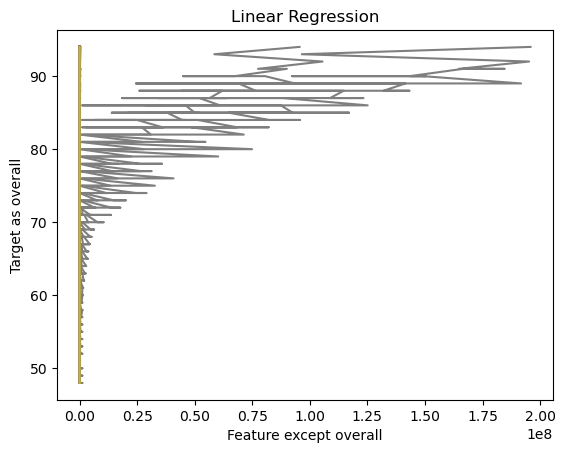

In [26]:
plt.plot(X,y)
plt.title("Linear Regression")
plt.xlabel("Feature except overall")
plt.ylabel("Target as overall")
plt.show()

In [27]:
#  Decision Tree

In [28]:
# Step 1: Create categorical target from 'overall'
# Example: Low <70, Medium 70-84, High >=85
y= pd.cut(fifa['overall'], bins=[0, 69, 84, 100], labels=['Low', 'Medium', 'High'])

# Step 2: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
# Step 3: Fit Decision Tree Classifier
model= DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [30]:
# Step 4: Predict on test set
y_pred = model.predict(X_test)

# Step 5: Evaluate
acc = accuracy_score(y_test, y_pred)
print("Decision Tree Classification Accuracy:", acc)

print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=['Low','Medium','High']))

Decision Tree Classification Accuracy: 0.9611597374179431

Classification Report:
               precision    recall  f1-score   support

         Low       0.83      0.62      0.71        24
      Medium       0.97      0.98      0.97      2546
        High       0.94      0.93      0.93      1086

    accuracy                           0.96      3656
   macro avg       0.91      0.84      0.87      3656
weighted avg       0.96      0.96      0.96      3656



In [31]:
# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create categorical target
y_class= pd.cut(fifa['overall'], bins=[0,69,84,100], labels=['Low','Medium','High'])

# Train/test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2,
                                                                            random_state=42)

In [33]:
# Random Forest Classifier
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [34]:
# Prediction 
y_pred_class = rf_class.predict(X_test_class)

# Evaluation
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class, target_names=['Low','Medium','High']))

Accuracy: 0.9904266958424508
              precision    recall  f1-score   support

         Low       0.95      0.88      0.91        24
      Medium       0.99      0.99      0.99      2546
        High       0.98      0.99      0.98      1086

    accuracy                           0.99      3656
   macro avg       0.98      0.95      0.96      3656
weighted avg       0.99      0.99      0.99      3656



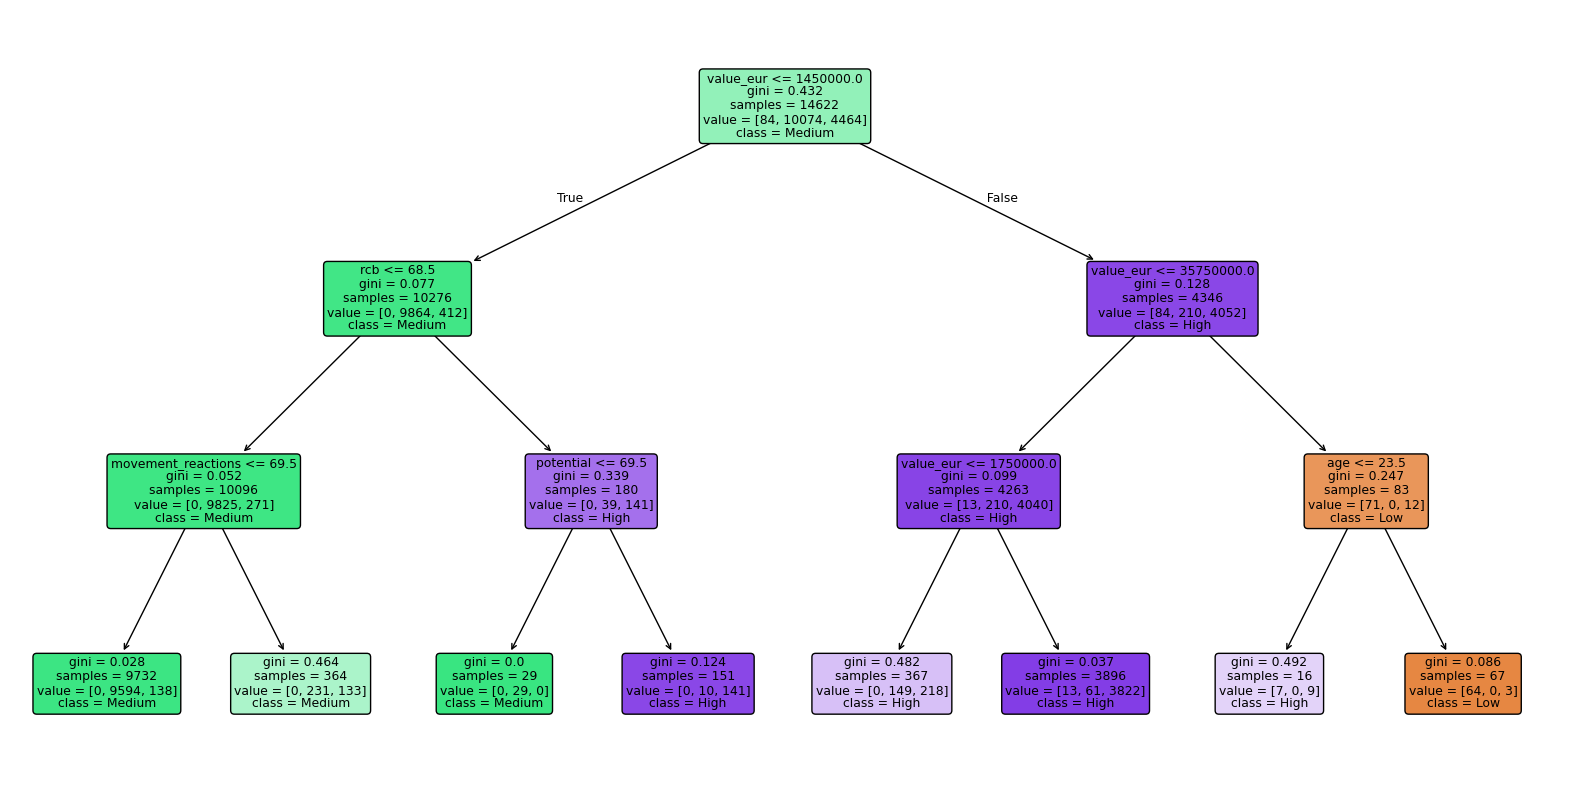

In [35]:
# Plot tree (Classification)
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Low','Medium','High'], filled=True, rounded=True)
plt.show()

In [36]:
# PCA

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature DataFrame

In [38]:
# apply pca on scaled data
# fit pca 
pca = PCA(n_components=2)  # reduce 2 component for 2d visualization
X_pca = pca.fit_transform(X_scaled)


In [39]:
# explained variance 
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio :", explained_variance)

Explained Variance Ratio : [0.25777069 0.19704916]


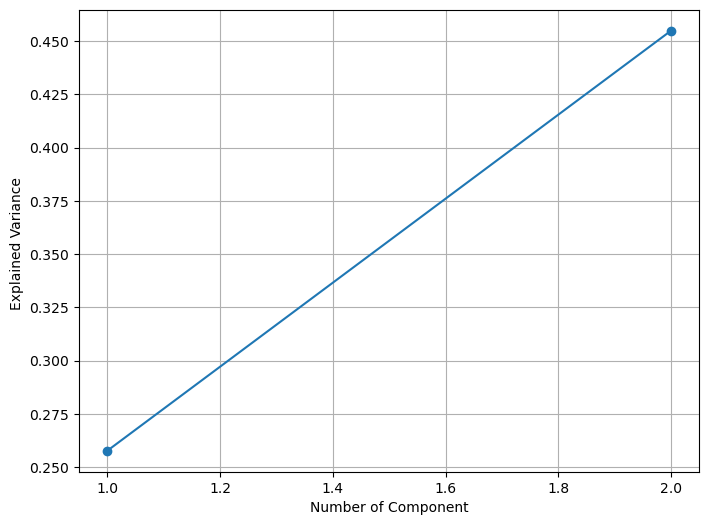

In [40]:
# screen plot 
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Component')
plt.ylabel('Explained Variance ')
plt.grid(True)
plt.show()

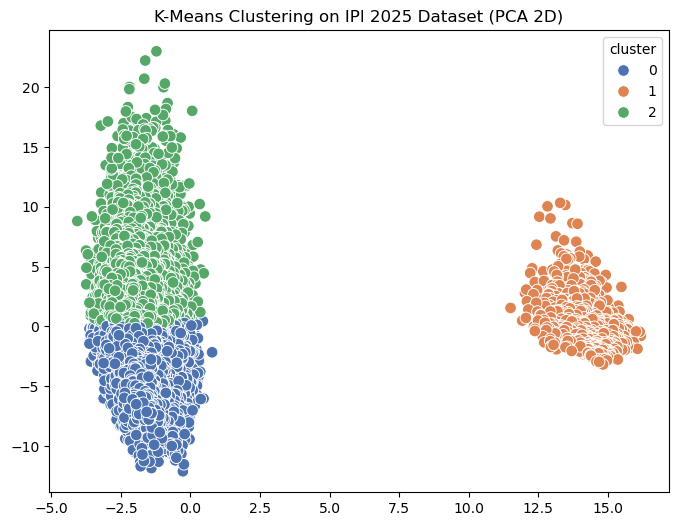

In [44]:
from sklearn.cluster import KMeans


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Try clustering into 3 groups (since we know Iris has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to dataframe
fifa['cluster'] = clusters

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=fifa['cluster'], palette="deep", s=70)
plt.title("K-Means Clustering on IPl 2025 Dataset (PCA 2D)")
plt.show()

In [45]:
# k means clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

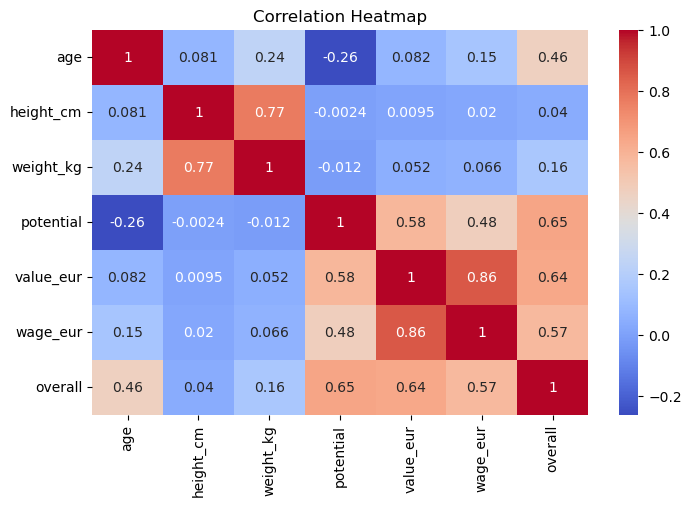

In [46]:
plt.figure(figsize=(8,5))
sns.heatmap(fifa[['age','height_cm','weight_kg', 'potential','value_eur','wage_eur',
                  'overall']].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

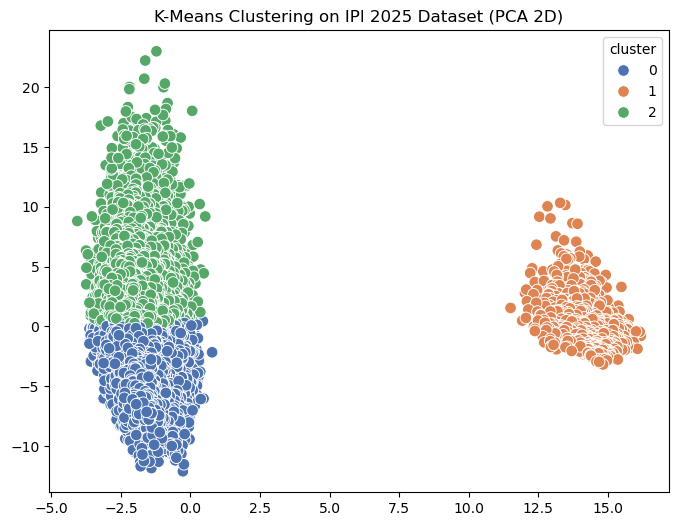

In [48]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Try clustering into 3 groups (since we know Iris has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to dataframe
fifa['cluster'] = clusters

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=fifa['cluster'], palette="deep", s=70)
plt.title("K-Means Clustering on IPl 2025 Dataset (PCA 2D)")
plt.show()

In [49]:
# For 2d -pca

categories = y_class.cat.codes  # converts 'Low','Medium','High' → 0,1,2


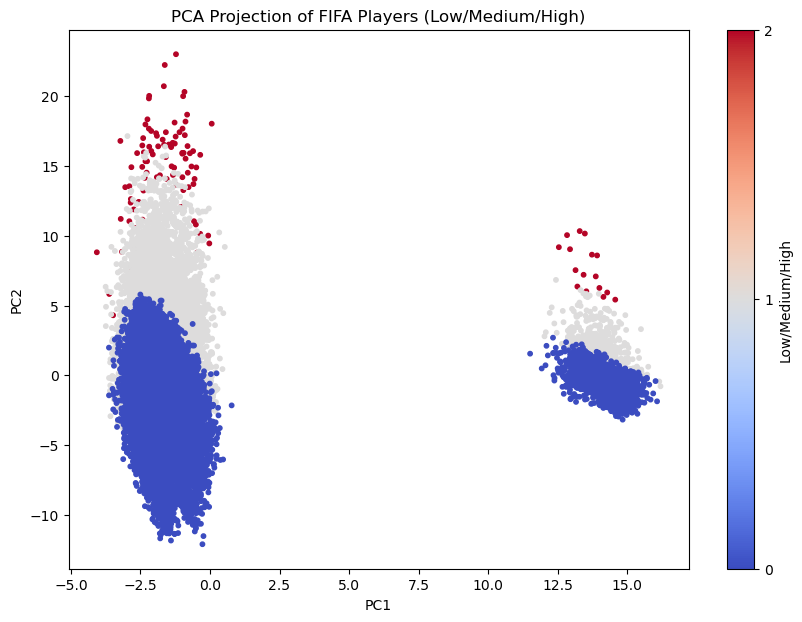

In [50]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=categories, cmap='coolwarm', s=10)
plt.colorbar(ticks=[0,1,2], label='Low/Medium/High')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of FIFA Players (Low/Medium/High)')
plt.show()


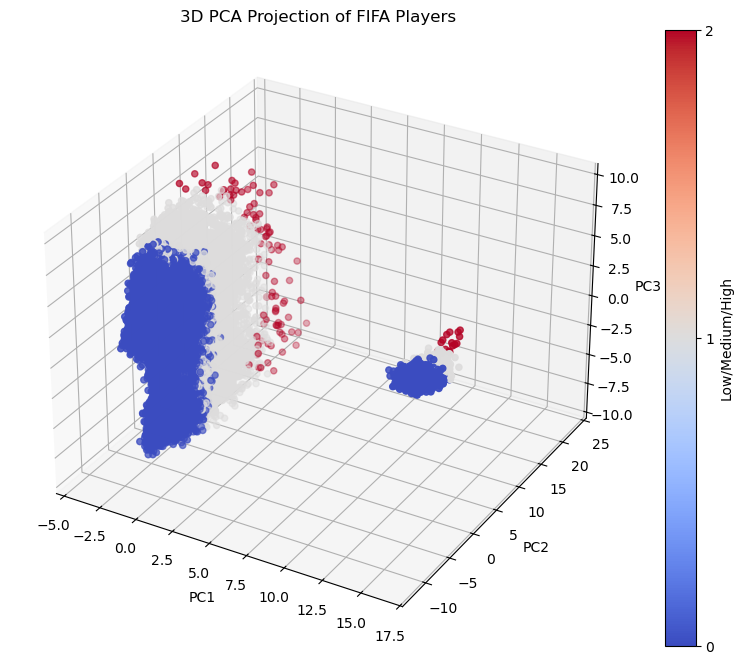

In [51]:
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# 1. Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = your features

# 2. Apply PCA for 3 components
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# 3. Convert categorical target to numeric codes
categories = y_class.cat.codes  # Low=0, Medium=1, High=2

# 4. Plot 3D scatter
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2],
    c=categories, cmap='coolwarm', s=20
)

# 5. Add color bar
cbar = fig.colorbar(scatter, ticks=[0,1,2])
cbar.set_label('Low/Medium/High')

# 6. Labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Projection of FIFA Players')

plt.show()
